<a href="https://colab.research.google.com/github/juligomez-web/Sys/blob/main/Ejercicios_Transformada_Fourier_21_10_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIOS



-Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

#Ejercicio: Modelo de la FFT para el cálculo de los armónicos

La **Transformada Rápida de Fourier (FFT)** es un algoritmo eficiente que permite calcular la **Transformada Discreta de Fourier (DFT)** de una señal discreta.  
Este modelo parte del principio de que **toda señal periódica puede expresarse como la suma de componentes senoidales** (armónicos) con diferentes frecuencias, amplitudes y fases.

La DFT, que es la base matemática de la FFT, se define como:

\[
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N}kn}
\]

donde:
- \( x[n] \): señal en el dominio del tiempo.  
- \( X[k] \): coeficiente complejo asociado al armónico \( k \).  
- \( N \): número total de muestras.  
- \( e^{-j(2\pi/N)kn} \): base compleja que genera las componentes sinusoidales.

Cada valor \( X[k] \) contiene:
- La **magnitud** del armónico, que indica cuánta energía tiene la señal en esa frecuencia.  
- La **fase**, que muestra el desplazamiento temporal del armónico.

El espectro de frecuencias obtenido por la FFT muestra los armónicos en múltiplos de la frecuencia fundamental:

\[
f_k = \frac{k}{N}f_s
\]

donde \( f_s \) es la frecuencia de muestreo.  
El modelo de la FFT asume que la señal \( x[n] \) es **periódica y discreta**, y que puede reconstruirse a partir de la suma de todas sus componentes armónicas:

\[
x(t) = \sum_{k=0}^{N-1} |X[k]| \cos(2\pi f_k t + \angle X[k])
\]

En resumen, la FFT **descompone una señal compleja en sus armónicos fundamentales**, permitiendo analizar su contenido espectral en términos de frecuencia, amplitud y fase.


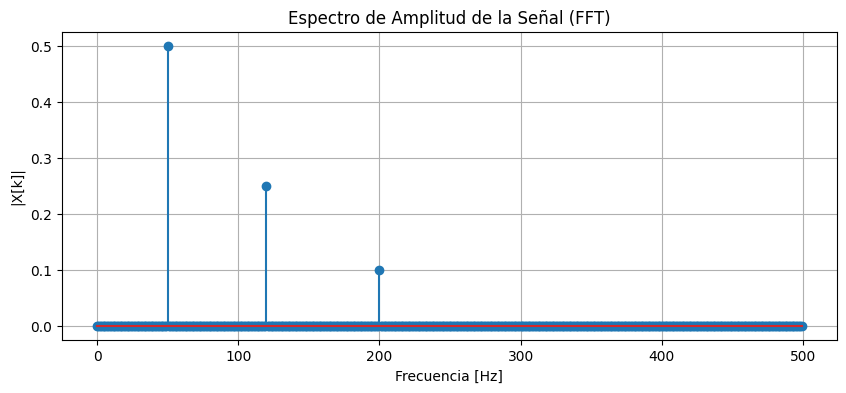

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000          # Frecuencia de muestreo [Hz]
T = 1              # Duración de la señal [s]
N = int(fs * T)    # Número de muestras
t = np.linspace(0, T, N, endpoint=False)

# Señal compuesta por varios armónicos
x = 1*np.cos(2*np.pi*50*t) + 0.5*np.cos(2*np.pi*120*t) + 0.2*np.cos(2*np.pi*200*t)

# FFT
X = np.fft.fft(x)
freq = np.fft.fftfreq(N, 1/fs)

# Magnitud normalizada
magnitude = np.abs(X)/N

# Gráfica del espectro
plt.figure(figsize=(10,4))
plt.stem(freq[:N//2], magnitude[:N//2])
plt.title("Espectro de Amplitud de la Señal (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()



# ⚙️ Ejercicio: Comparación del tiempo de cómputo entre DFT y FFT

En este ejercicio se realiza una comparación del **tiempo de cómputo** requerido para el cálculo de la **Transformada Discreta de Fourier (DFT)** mediante dos métodos:

1. **Estimación por sumatoria directa** (implementación manual de la fórmula de la DFT).  
2. **Cálculo mediante la FFT** (Fast Fourier Transform), que optimiza el proceso usando simetrías y recursividad.

La DFT está definida matemáticamente como:

\[
X[k] = \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N}kn}
\]

Este método requiere \( N^2 \) operaciones, mientras que la FFT reduce el número de operaciones a \( N \log_2 N \).

Para evaluar la diferencia en tiempo, se probarán distintas longitudes de señal:

\[
N = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
\]

Finalmente, se graficará el **tiempo de ejecución (s)** frente a la **longitud de la señal**, comparando ambos métodos.


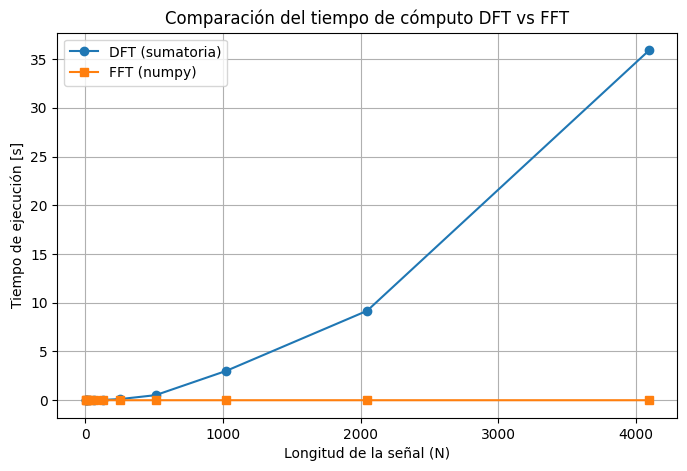

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Definición de la DFT manual (por sumatoria)
def DFT_manual(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X

# Longitudes de señal a probar
N_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Listas para guardar los tiempos
tiempos_DFT = []
tiempos_FFT = []

# Evaluación del tiempo para cada longitud
for N in N_values:
    x = np.random.rand(N)

    # Tiempo DFT manual
    inicio = time.time()
    DFT_manual(x)
    fin = time.time()
    tiempos_DFT.append(fin - inicio)

    # Tiempo FFT (NumPy)
    inicio = time.time()
    np.fft.fft(x)
    fin = time.time()
    tiempos_FFT.append(fin - inicio)

# Gráfica comparativa
plt.figure(figsize=(8,5))
plt.plot(N_values, tiempos_DFT, 'o-', label='DFT (sumatoria)')
plt.plot(N_values, tiempos_FFT, 's-', label='FFT (numpy)')
plt.title('Comparación del tiempo de cómputo DFT vs FFT')
plt.xlabel('Longitud de la señal (N)')
plt.ylabel('Tiempo de ejecución [s]')
plt.legend()
plt.grid(True)
plt.show()


#  Ejercicio: Frecuencia de –3 dB y su relación con las frecuencias de corte

La **frecuencia de –3 dB** es el punto en el espectro de una señal o sistema donde la **potencia** se reduce a la mitad del valor máximo.  
En términos de **amplitud**, esto equivale aproximadamente a una reducción del **70.7%** del valor máximo, ya que:

\[
20 \log_{10}\left(\frac{A}{A_{max}}\right) = -3 \text{ dB}
\quad \Rightarrow \quad
A = 0.707 \, A_{max}
\]

---

## 📘 Relación con las frecuencias de corte

En un **filtro** (pasa bajas, pasa altas, pasa banda, etc.), las **frecuencias de corte** se definen como aquellas donde la **ganancia** del filtro cae **3 dB por debajo** del valor máximo de la banda pasante.

Estas frecuencias delimitan las **regiones del espectro**:
- **Banda pasante:** donde el filtro deja pasar la señal con ganancia casi constante.  
- **Banda de rechazo:** donde el filtro atenúa las frecuencias.  
- **Frecuencias de corte (–3 dB):** transición entre ambas regiones.

Matemáticamente, si la respuesta en frecuencia del filtro es \( |H(f)| \),  
las frecuencias de corte \( f_c \) cumplen:

\[
|H(f_c)| = \frac{|H_{max}|}{\sqrt{2}} = 0.707 \, |H_{max}|
\]

---




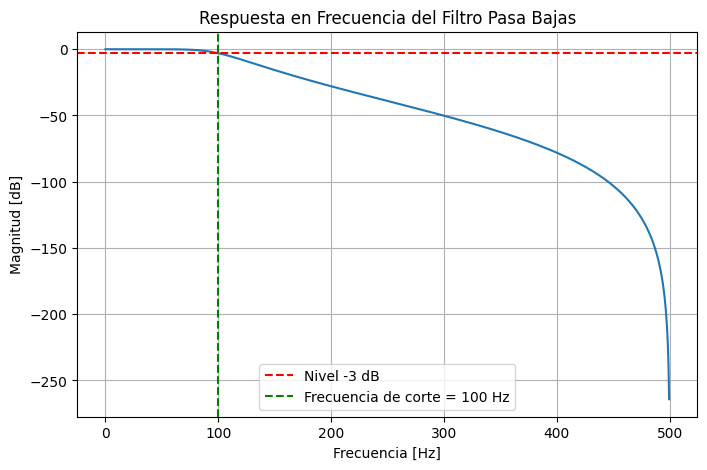

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros
fs = 1000  # Frecuencia de muestreo [Hz]
f_cutoff = 100  # Frecuencia de corte [Hz]
t = np.linspace(0, 1, fs, endpoint=False)
x = np.cos(2*np.pi*50*t) + np.cos(2*np.pi*200*t)  # Señal con dos frecuencias

# Diseño de filtro pasa bajas Butterworth de orden 4
b, a = signal.butter(4, f_cutoff/(fs/2), btype='low', analog=False)
w, h = signal.freqz(b, a, worN=1024, fs=fs)

# Cálculo en dB
H_dB = 20 * np.log10(abs(h))

# Gráfica de la respuesta en frecuencia
plt.figure(figsize=(8,5))
plt.plot(w, H_dB)
plt.axhline(-3, color='r', linestyle='--', label='Nivel -3 dB')
plt.axvline(f_cutoff, color='g', linestyle='--', label=f'Frecuencia de corte = {f_cutoff} Hz')
plt.title('Respuesta en Frecuencia del Filtro Pasa Bajas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid(True)
plt.legend()
plt.show()


#  Ejercicio: Implementación de filtros espectrales usando FFT e IFFT

En este ejercicio se implementan cuatro tipos de filtros digitales aplicados a una señal de audio de 5 segundos obtenida de una canción favorita.

Los filtros son:
1. **Filtro pasa bajas (LPF)** → deja pasar las frecuencias bajas y atenúa las altas.  
2. **Filtro pasa altas (HPF)** → deja pasar las frecuencias altas y atenúa las bajas.  
3. **Filtro pasa bandas (BPF)** → deja pasar solo un rango específico de frecuencias.  
4. **Filtro rechaza bandas (BRF)** → elimina un rango de frecuencias, dejando pasar el resto.

El procedimiento se basa en el **procesamiento espectral** mediante:
- La **Transformada Rápida de Fourier (FFT)** para pasar del dominio del tiempo al dominio de la frecuencia.  
- La **Transformada Inversa de Fourier (IFFT)** para reconstruir la señal filtrada.

Se trabajará sobre un fragmento de **5 segundos** de audio, y se visualizarán los resultados tanto en el dominio del tiempo como en el de la frecuencia.
